# Projeto final - Programação para deep learning

> # Análise de dados dos casos de dengue no Brasil

Objetivo: realizar uma análise de dados de casos de dengue no Brasil

Integrandes da equipe:

- Débora Freitas
- Douglas Guedes
- Italo Yoshito
- Marcos Eduardo
- Silvandro Pedrozo

> ## Obtenção dos dados

- A extração dos dados foi obtida por meio do SINAN (Sistemas de Agravo e notificação) do DATASUS / Ministério da Saúde;
- O SINAN coleta, processa e dissemina dados sobre doenças e agravos de notificação compulsória, bem como outros agravos de interesse local. Ele é utilizado para monitorar a ocorrência dessas condições, auxiliar na tomada de decisões em saúde pública e planejar ações de vigilância epidemiológica;
Os dados foram obtidos por meio do SQL via portal Base dos Dados (acesso [aqui](https://basedosdados.org/dataset/f51134c2-5ab9-4bbc-882f-f1034603147a?table=9bdbca38-d97f-47fa-b422-84477a6b68c8)).
- A plataforma gera uma consulta no BigQuery, onde foi acrescentado, também, alguns filtros para a extração dos dados, tais como:
> WHERE ano = 2024  
> ORDER BY RAND()  
> LIMIT 10000

---

# 1. Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

---

# 2. Importação dos dados

In [3]:
df = pd.read_csv('dados-projeto/dengue_2024.csv',low_memory=False)

---

# 3. Inspeção dos dados e validações

In [4]:
df.head()

,ano,tipo_notificacao,id_agravo,data_notificacao,semana_notificacao,sigla_uf_notificacao,sigla_uf_notificacao_nome,id_regional_saude_notificacao,id_municipio_notificacao,id_municipio_notificacao_nome,id_estabelecimento,data_primeiros_sintomas,semana_sintomas,pais_residencia,sigla_uf_residencia,sigla_uf_residencia_nome,id_regional_saude_residencia,id_municipio_residencia,id_municipio_residencia_nome,ano_nascimento_paciente,data_nascimento_paciente,idade_paciente,sexo_paciente,raca_cor_paciente,escolaridade_paciente,ocupacao_paciente,ocupacao_paciente_descricao,ocupacao_paciente_descricao_familia,ocupacao_paciente_descricao_subgrupo,ocupacao_paciente_descricao_subgrupo_principal,ocupacao_paciente_descricao_grande_grupo,gestante_paciente,possui_doenca_autoimune,possui_diabetes,possui_doencas_hematologicas,possui_hepatopatias,possui_doenca_renal,possui_hipertensao,possui_doenca_acido_peptica,paciente_vacinado,data_vacina,data_investigacao,apresenta_febre,data_febre,duracao_febre,apresenta_cefaleia,apresenta_exantema,apresenta_dor_costas,apresenta_prostacao,apresenta_mialgia,apresenta_vomito,apresenta_nausea,apresenta_diarreia,apresenta_conjutivite,apresenta_dor_retroorbital,apresenta_artralgia,apresenta_artrite,apresenta_leucopenia,apresenta_epistaxe,apresenta_petequias,apresenta_gengivorragia,apresenta_metrorragia,apresenta_hematuria,apresenta_sangramento,apresenta_complicacao,apresenta_ascite,apresenta_pleurite,apresenta_pericardite,apresenta_dor_abdominal,apresenta_hepatomegalia,apresenta_miocardite,apresenta_hipotensao,apresenta_choque,apresenta_insuficiencia_orgao,apresenta_sintoma_outro,apresenta_qual_sintoma,prova_laco,internacao,data_internacao,sigla_uf_internacao,sigla_uf_internacao_nome,id_municipio_internacao,id_municipio_internacao_nome,alarme_hipotensao,alarme_plaqueta,alarme_vomito,alarme_sangramento,alarme_hematocrito,alarme_dor_abdominal,alarme_letargia,alarme_hepatomegalia,alarme_liquidos,data_alarme,grave_pulso,grave_convulsao,grave_enchimento_capilar,grave_insuficiencia_respiratoria,grave_taquicardia,grave_extremidade_fria,grave_hipotensao,grave_hematemese,grave_melena,grave_metrorragia,grave_sangramento,grave_ast_alt,grave_miocardite,grave_consciencia,grave_orgaos,data_hematocrito,hematocrito_maior,data_plaquetas,plaqueta_maior,data_hematocrito_2,hematocrito_menor,data_plaquetas_2,plaqueta_menor,data_sorologia1_chikungunya,data_resultado_sorologia1_chikungunya,resultado_sorologia1_chikungunya,sorologia1_igm,sorologia1_igg,sorologia1_tit1,resultado_sorologia2_chikungunya,sorologia2_igm,sorologia2_igg,sorologia2_tit1,resultado_prnt,data_ns1,resultado_ns1,data_viral,resultado_viral,data_pcr,resultado_pcr,amostra_pcr,amostra_outra,tecnica,resultado_amostra_outra,data_sorologia_dengue,resultado_sorologia_dengue,sorotipo,histopatologia,imunohistoquimica,manifestacao_hemorragica,classificacao_final,criterio_confirmacao,caso_fhd,caso_autoctone,pais_infeccao,sigla_uf_infeccao,sigla_uf_infeccao_nome,id_municipio_infeccao,id_municipio_infeccao_nome,doenca_trabalho,apresentacao_clinica,evolucao_caso,data_obito,data_encerramento,tipo_sistema,data_digitacao
0,2024,Individual,A90,2024-02-04,2024-06,SP,São Paulo,1341.0,3550100,São Manuel,2080443.0,2024-02-01,2024-05,1,SP,São Paulo,1341.0,3550100.0,São Manuel,1970.0,NaN,4-053,Feminino,Branca,1ª a 4ª série incompleta do EF,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,NaN,NaN,2024-02-04,2.0,NaN,NaN,Sim,Não,Não,NaN,Sim,Não,NaN,NaN,Não,Sim,Não,Sim,Não,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-04,Positivo,NaN,Não Realizado,NaN,Não Realizado,NaN,NaN,NaN,NaN,NaN,Não Realizado,NaN,Não Realizado,Não Realizado,NaN,Dengue,Laboratório,NaN,NaN,NaN,SP,São Paulo,3550100.0,São Manuel,NaN,NaN,Cura,NaN,2024-02-13,NaN,2024-02-13
1,2024,Individual,A

In [5]:
# Verificando total de linhas e colunas

df.shape

(9259, 159)

In [6]:
# Verificando se há linhas duplicadas

df.duplicated().sum()

0

In [7]:
# Colunas que possuem > 80% dos dados ausentes

print((df.isna().mean() * 100)[df.isna().mean() * 100 > 80].to_string())

data_nascimento_paciente                          100.000000
ocupacao_paciente_descricao                        89.070094
ocupacao_paciente_descricao_familia                89.070094
ocupacao_paciente_descricao_subgrupo               89.070094
ocupacao_paciente_descricao_subgrupo_principal     89.070094
ocupacao_paciente_descricao_grande_grupo           89.070094
paciente_vacinado                                 100.000000
data_vacina                                       100.000000
data_febre                                        100.000000
duracao_febre                                     100.000000
apresenta_prostacao                               100.000000
apresenta_nausea                                  100.000000
apresenta_diarreia                                100.000000
apresenta_epistaxe                                100.000000
apresenta_gengivorragia                           100.000000
apresenta_metrorragia                             100.000000
apresenta_hematuria     

In [8]:
df_antigo = df.copy()

In [9]:
# Removendo colunas com mais de 80% de valores ausentes

df = df.loc[:, (df.isna().mean() * 100) <= 80]

In [10]:
# Verificando total de linhas e colunas após o filtro de exclusão

df.shape

(9259, 63)

---

# 4. Análise geral / levantamento quantitativo

## 0- Funções para os gráficos da seção 4

In [11]:
# Para as perguntas 1 e 2

def plot_horizontal_bar(count_data, x_label, y_label, title):
    plt.figure(figsize=(8, 4))
    bars = plt.barh(count_data.index, count_data.values, color='skyblue', edgecolor='black')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, 
                 bar.get_y() + bar.get_height() / 2,
                 f' {int(width)}',
                 ha='left',
                 va='center',
                 fontsize=10
                 )
    
    plt.title(title, fontsize=15)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

In [12]:
# Para as perguntas 3, 4, 5 e 6

def plot_value_counts(df, coluna, titulo=None, dropna=False, figsize=(10, 4),rot=0):
    """
    Plota um gráfico de barras com base no value_counts() de uma coluna do DataFrame.

    Parâmetros:
    - df: DataFrame do Pandas
    - coluna: nome da coluna (string)
    - titulo: título do gráfico (se None, usa o nome da coluna)
    - dropna: se True, ignora valores NaN
    - figsize: tamanho da figura (largura, altura)
    """
    contagem = df[coluna].value_counts(dropna=dropna)

    plt.figure(figsize=figsize)
    contagem.plot(kind='bar',rot=rot)
    plt.title(titulo if titulo else coluna)
    plt.xlabel('')
    plt.ylabel('Número de casos')
    plt.show()

## 1- Quantitativo da evolução do caso

> ### Mais casos de cura do que de óbitos.

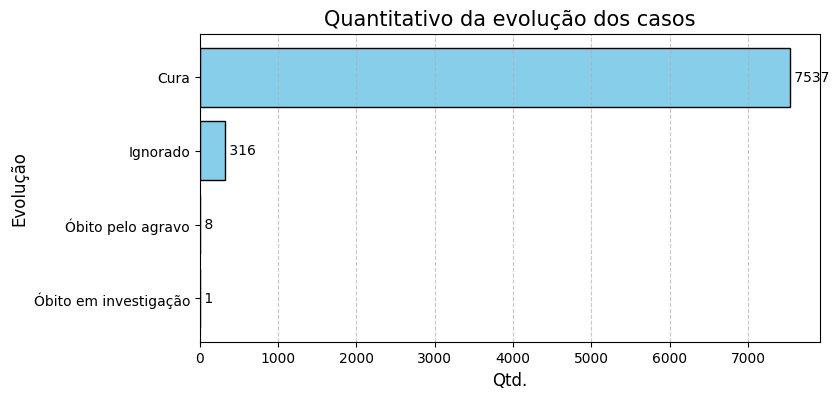

In [13]:
evolution = df['evolucao_caso'].value_counts().sort_values(ascending=True)
plot_horizontal_bar(evolution, x_label='Qtd.', y_label='Evolução', title='Quantitativo da evolução dos casos')

---

## 2- Quantitativo da evolução final do diagnóstico

> ### Mais casos de dengue habitual em comparação aos casos graves.

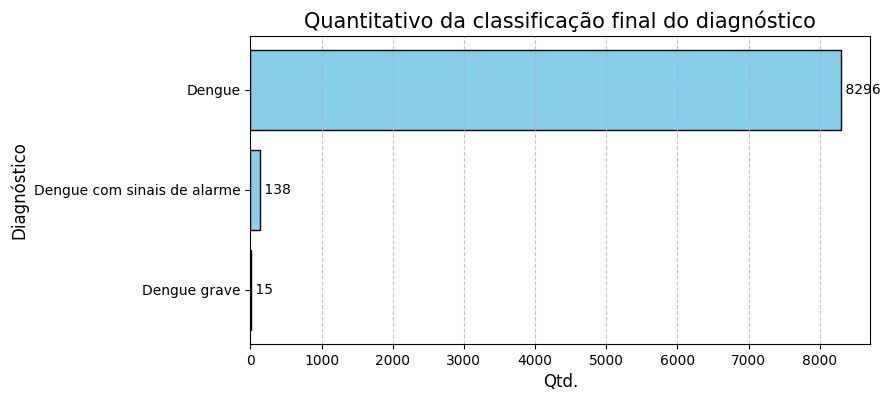

In [14]:
final_classification = df['classificacao_final'].value_counts().sort_values(ascending=True)
plot_horizontal_bar(final_classification, x_label='Qtd.', y_label='Diagnóstico', title='Quantitativo da classificação final do diagnóstico')

---

## 3- Quantitativo por estado

> ### São Paulo, Minas gerais e Paraná em destaque.

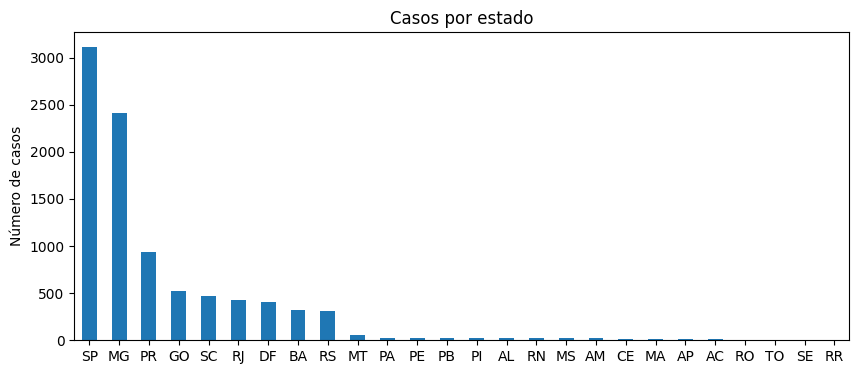

In [15]:
plot_value_counts(df, 'sigla_uf_notificacao', titulo='Casos por estado')

In [16]:
# df['sigla_uf_notificacao'].value_counts(dropna=False)

---

## 4- Quantitativo por sexo

> ### Mais casos de indivíduos do sexo feminino, porém não tão expressivo.

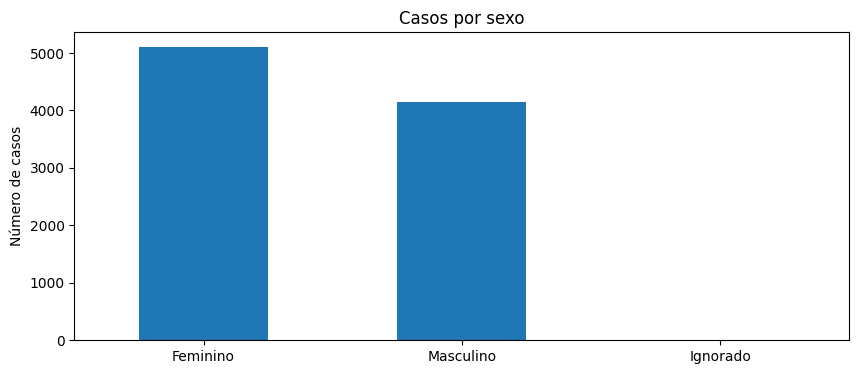

In [17]:
plot_value_counts(df, 'sexo_paciente', titulo='Casos por sexo')

In [18]:
# df['sexo_paciente'].value_counts(dropna=False)

---

## 5- Quantitativo por escolaridade

> ### Mais casos de indivíduos com o ensino médio completo registrados.

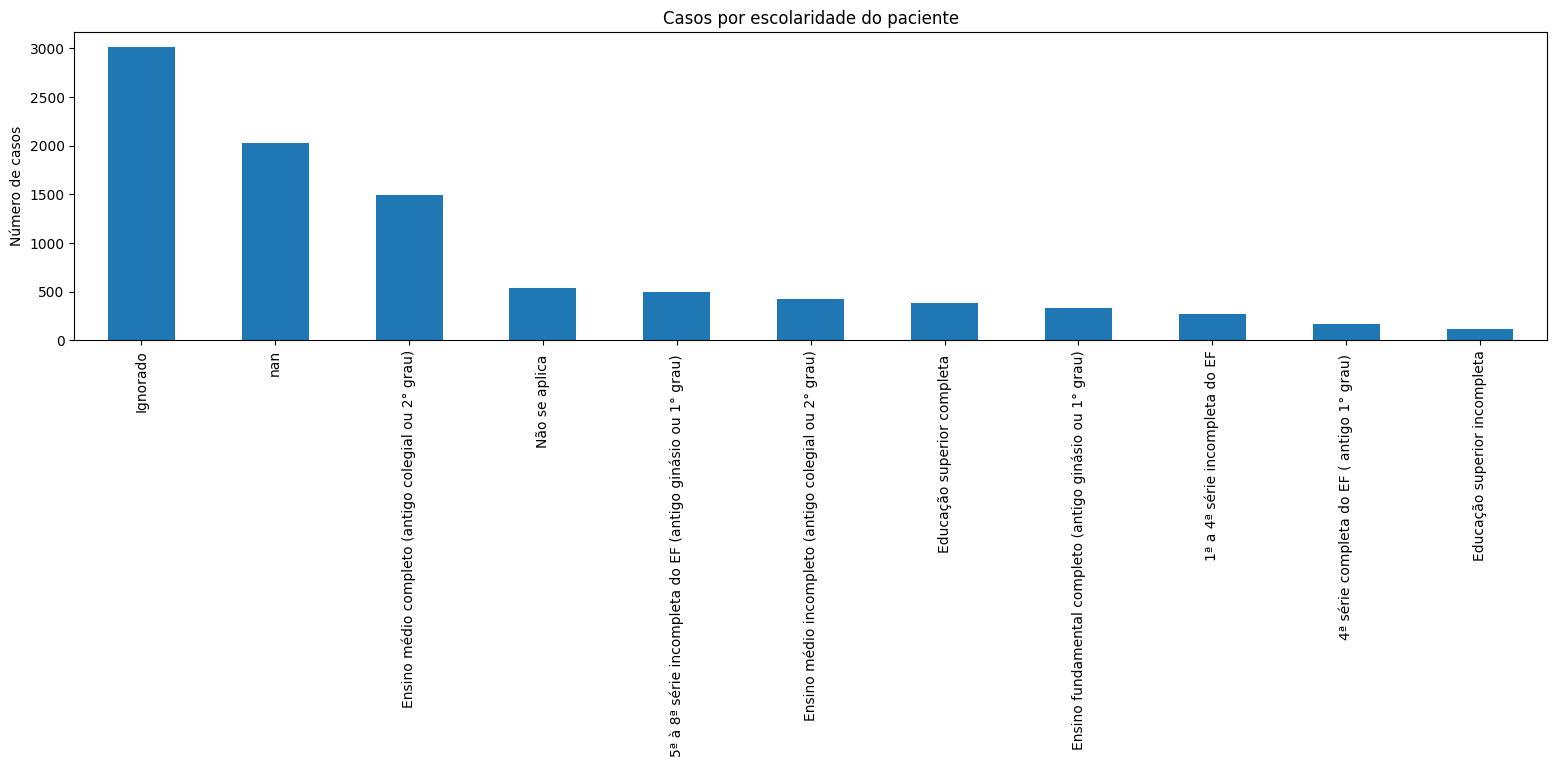

In [19]:
plot_value_counts(df, 'escolaridade_paciente', titulo='Casos por escolaridade do paciente',
                 figsize=(19, 4), rot=90)

In [20]:
# df['escolaridade_paciente'].value_counts(dropna=False)

---

## 6- Casos por município (top 20)

> ### São Paulo é o município de maior destaque, seguido de Brasília e Belo Horizonte.
> OBS: vários municípios do estado de São Paulo estão no top 20 (problema de saúde pública).

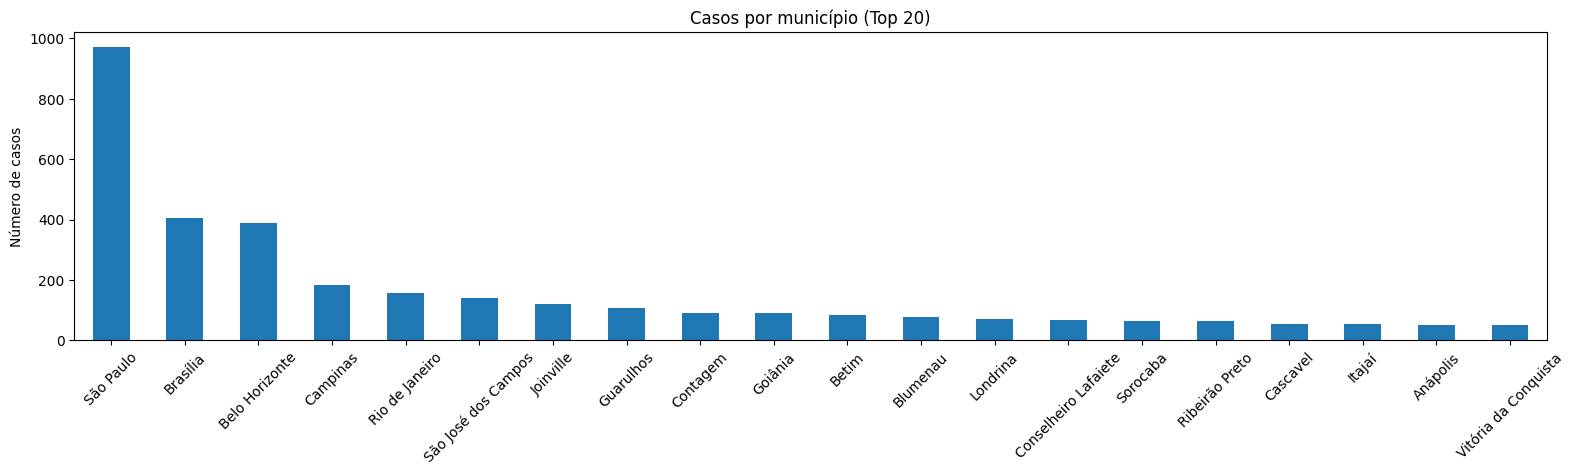

In [21]:
# Top 20 municípios mais frequentes
top20 = df['id_municipio_notificacao_nome'].value_counts(dropna=False).head(20)
df_top20 = df[df['id_municipio_notificacao_nome'].isin(top20.index)]

# Gráfico
plot_value_counts(df_top20, 'id_municipio_notificacao_nome',
                  titulo='Casos por município (Top 20)',
                  figsize=(19,4), rot=45)

In [22]:
# df['id_municipio_notificacao_nome'].value_counts(dropna=False)

---

# 5. Análises aprofundadas / insights

## 7- Top 5 estados com maior destaque e top 5 estados com menor destaque

> ### Sul e sudeste em destaque nos top estados com mais casos encontrados na base
> OBS: maior densidade populacional e urbanização, que favorecem a proliferação do vetor.
> ### Norte e nordeste em destaque nos top estados com menos casos encontrados na base
> OBS: condições climáticas favoráveis para o mosquito, no entanto, menor densidade populacional e maior propensão à subnotificação.

In [23]:
# Agrupamento

casos_por_uf = df.groupby("sigla_uf_notificacao").size().reset_index(name="total_casos").sort_values(ascending=False,by='total_casos')

# Filtrando os 5 maiores casos e 5 menores casos

top5_maiores =  casos_por_uf.head()
top5_menores =  casos_por_uf.tail().sort_values(ascending=True,by='total_casos')

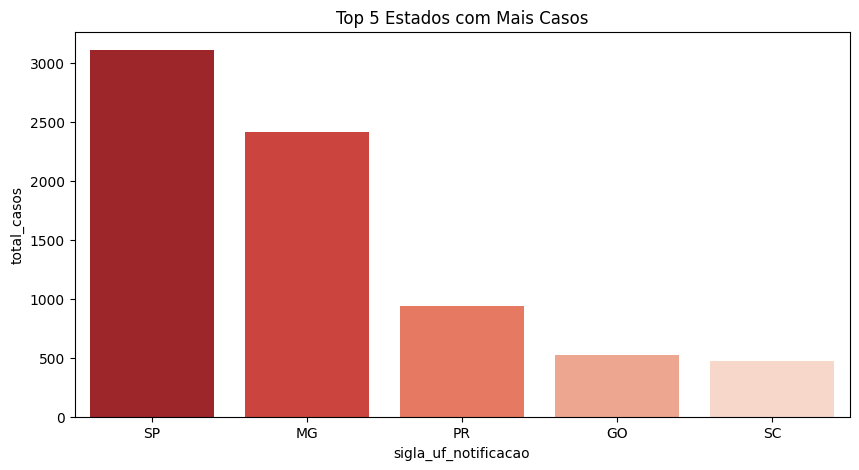

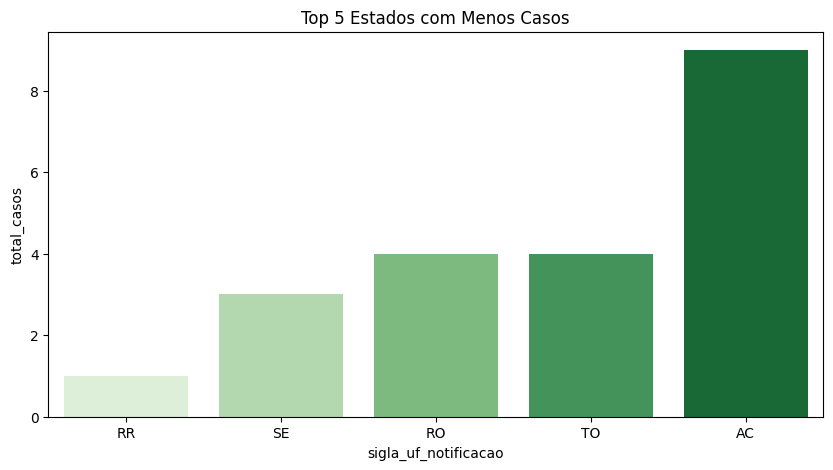

In [24]:
# Aqui são demonstrados os gráficos de maiores e menores em questão de casos:

plt.figure(figsize=(10,5))
sns.barplot(
    data=top5_maiores,
    x="sigla_uf_notificacao",
    y="total_casos",
    hue="sigla_uf_notificacao",
    palette="Reds_r",
    legend=False
)

plt.title("Top 5 Estados com Mais Casos")
plt.figure(figsize=(10,5))
sns.barplot(
    data=top5_menores,
    x="sigla_uf_notificacao",
    y="total_casos",
    hue="sigla_uf_notificacao",
    palette="Greens",
    legend=False
)
plt.title("Top 5 Estados com Menos Casos")
plt.show()

---

## 8- Quais os top 3 municípios de maior destaque por estado (do top 5 acima)

> ### Capitais dos estados em destaque na maioria dos casos

In [25]:
# Criando uma lista contendo as siglas dos estados que estão no top 5 de maiores casos

estados_selecionados = list(top5_maiores["sigla_uf_notificacao"]) + list(top5_menores["sigla_uf_notificacao"])
estados_selecionados

['SP', 'MG', 'PR', 'GO', 'SC', 'RR', 'SE', 'RO', 'TO', 'AC']

In [26]:
municipios_por_estado = (
    df[df["sigla_uf_notificacao"].isin(estados_selecionados)]
    .groupby(["sigla_uf_notificacao", "id_municipio_notificacao_nome"])
    .size()
    .reset_index(name="total_casos")
)
municipios_por_estado.head()

,sigla_uf_notificacao,id_municipio_notificacao_nome,total_casos
0,AC,Brasiléia,2
1,AC,Cruzeiro do Sul,2
2,AC,Feijó,1
3,AC,Rio Branco,2
4,AC,Tarauacá,2


In [27]:
# Filtragem por grupo para pegar os 3 municípios com mais casos em cada estado

top3_municipios_por_estado = (
    municipios_por_estado.groupby("sigla_uf_notificacao", group_keys=True)
    .apply(lambda x: x.nlargest(3, "total_casos"), include_groups=False)
    .reset_index()
)

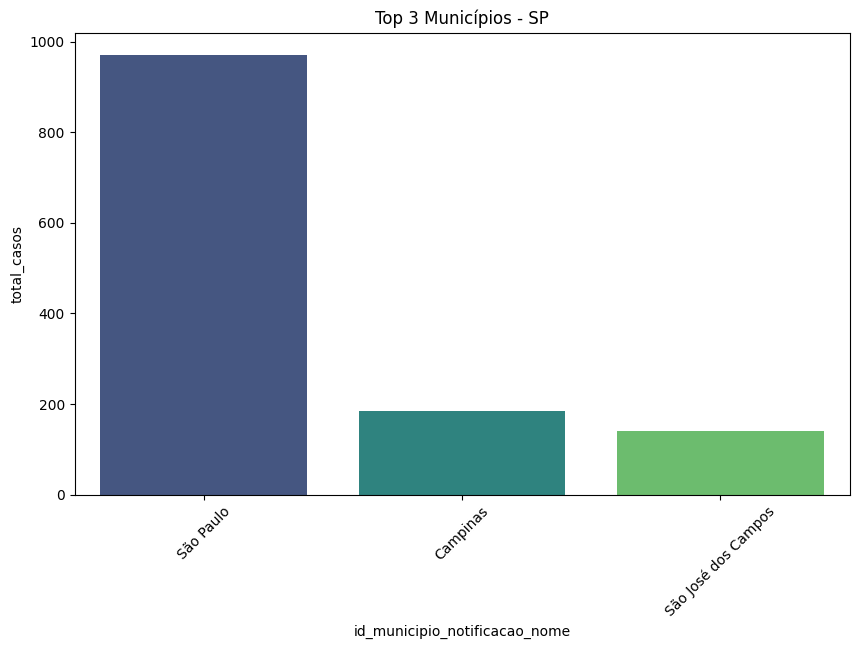

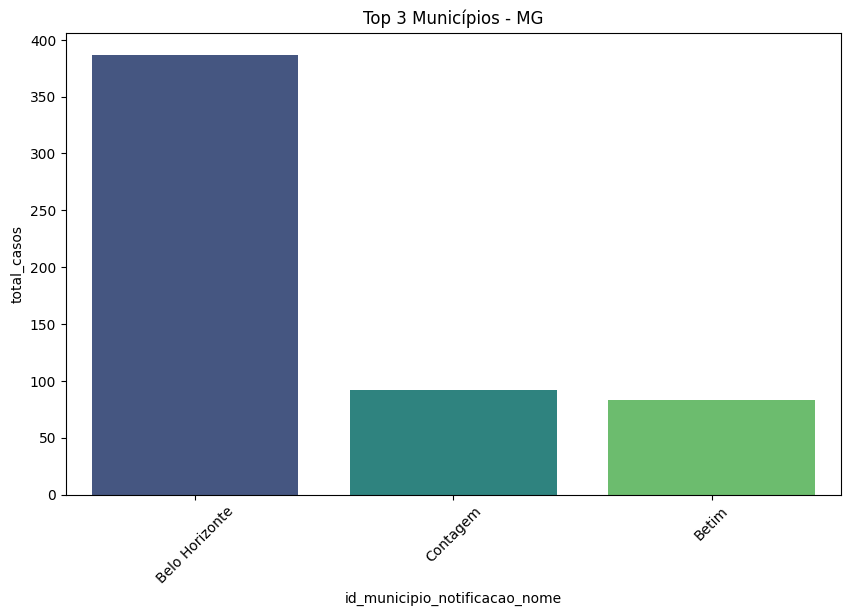

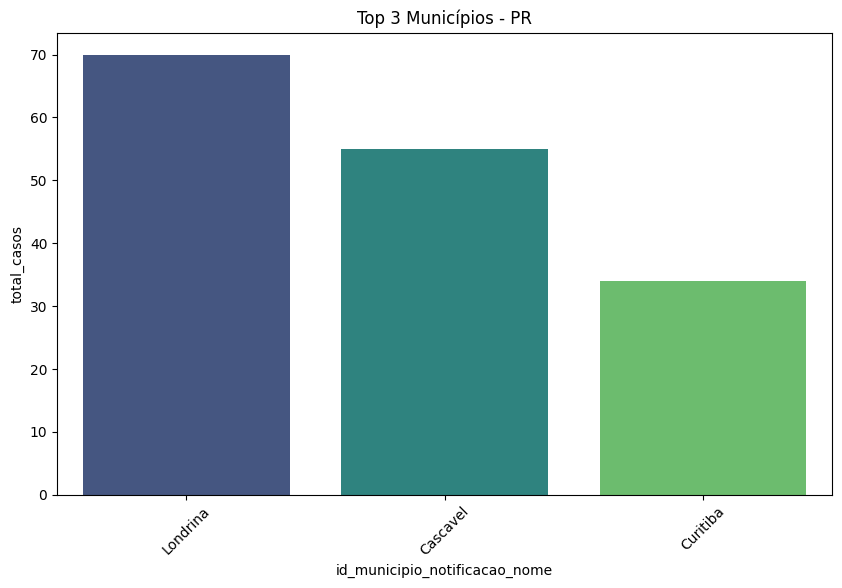

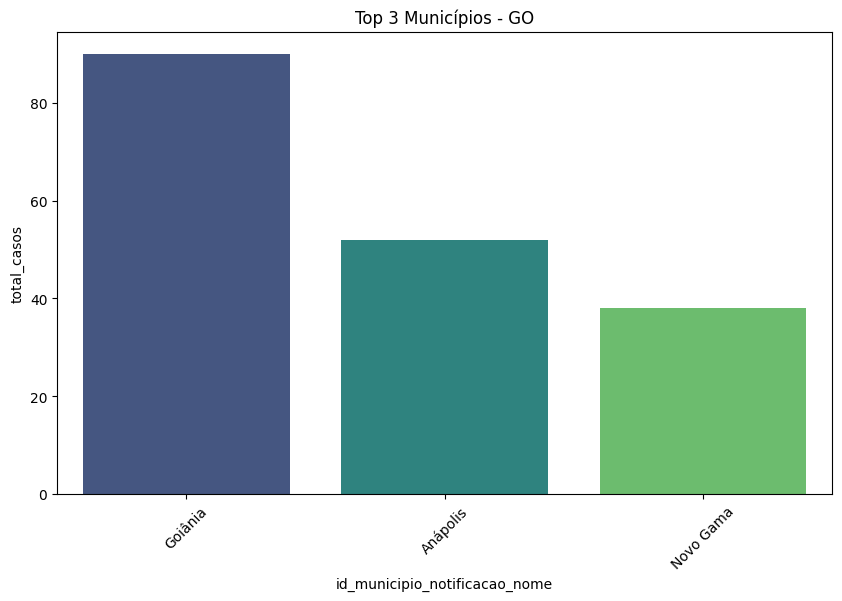

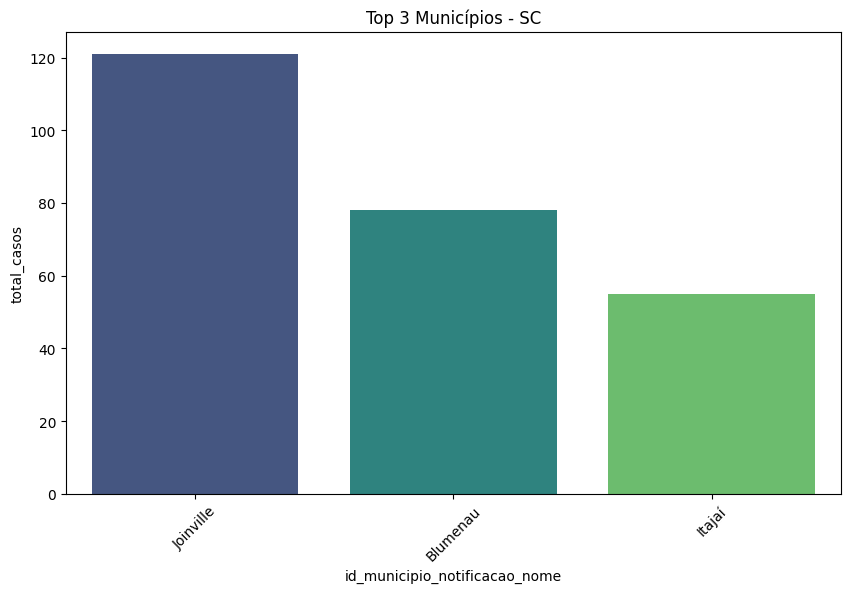

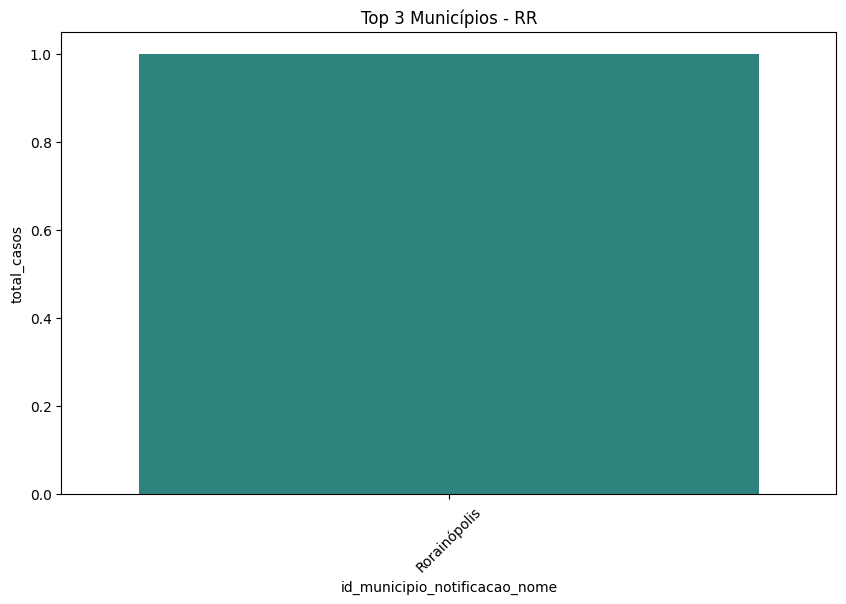

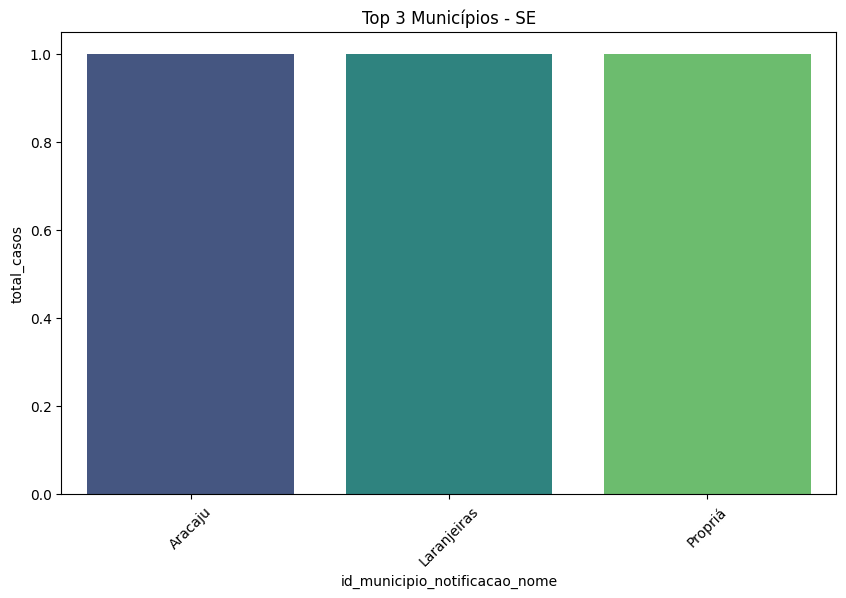

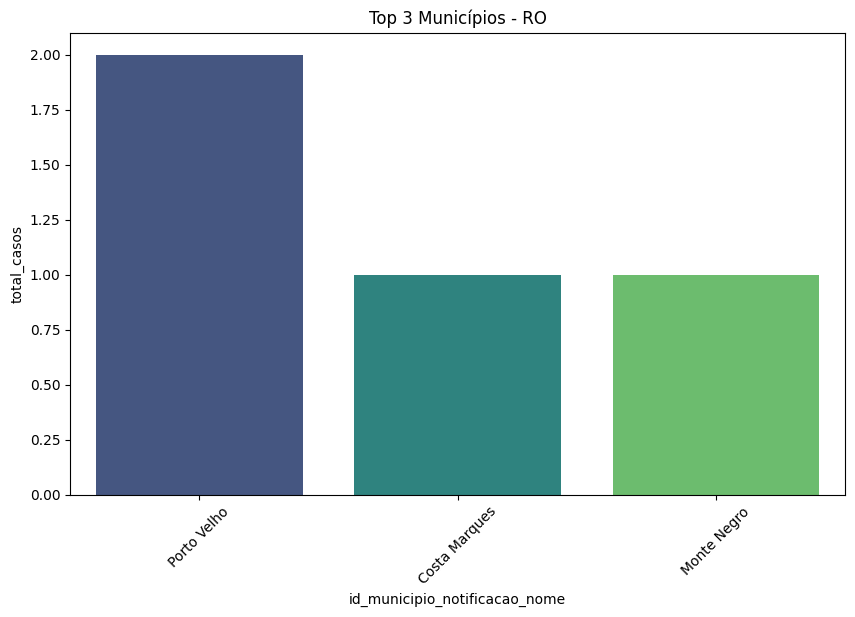

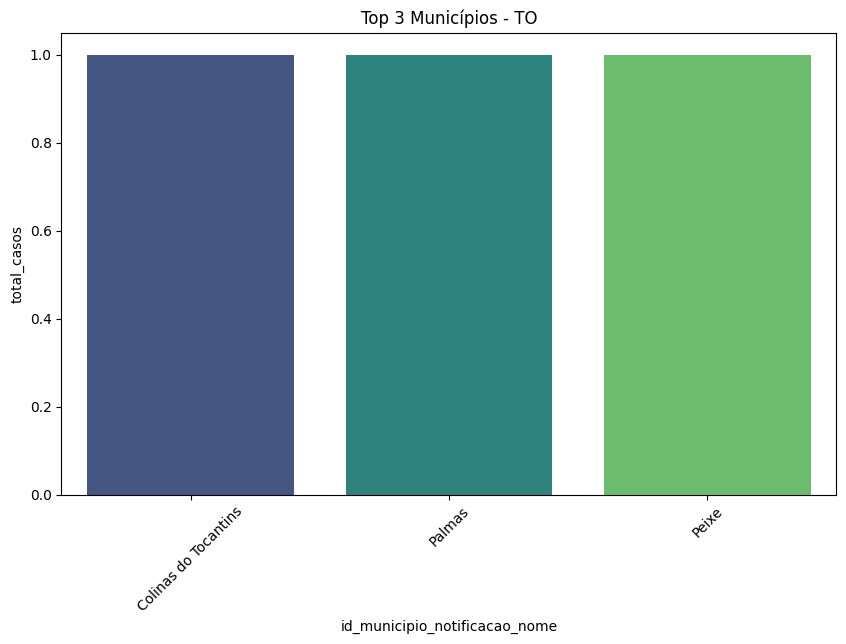

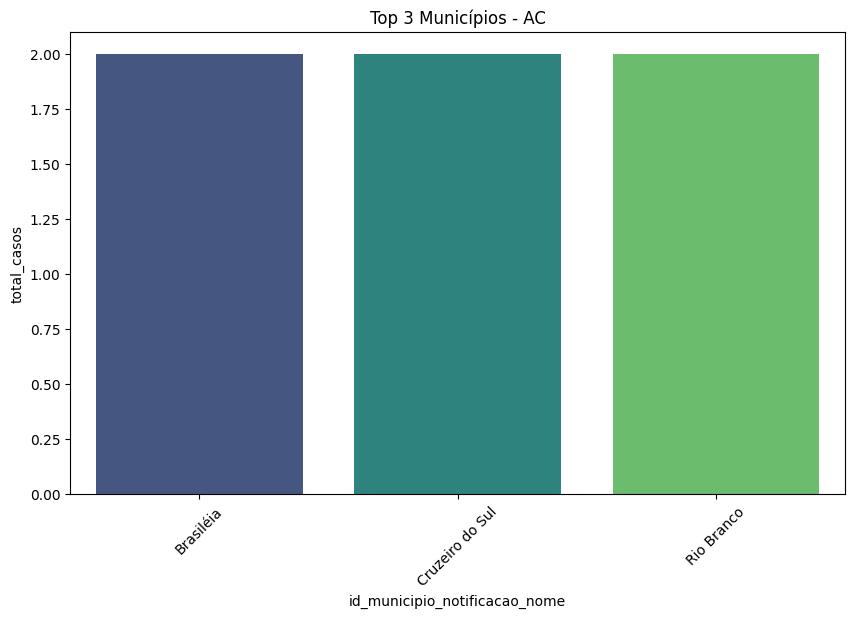

In [28]:
# Aqui se montam os gráficos por estado, com os municípios de destaque

for estado in estados_selecionados:
    dados_estado = top3_municipios_por_estado[
        top3_municipios_por_estado["sigla_uf_notificacao"] == estado
    ]
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=dados_estado,
        x="id_municipio_notificacao_nome",
        y="total_casos",
        hue="id_municipio_notificacao_nome",
        palette="viridis",
        legend=False
    )
    plt.title(f"Top 3 Municípios - {estado}")
    plt.xticks(rotation=45)
    plt.show()

---

## 9- Total e tipos de exames realizados por estado

In [29]:
# Informativo

| Exame                  | O que é                                                    | Quando é usado                           | Observações                                                                                 |
|------------------------|------------------------------------------------------------|-----------------------------------------|--------------------------------------------------------------------------------------------|
| Viral (isolamento viral)| Técnica que cultiva o vírus a partir de amostras de sangue | Primeiros dias de sintomas (fase aguda) | Pouco usado por ser mais caro e demorado; serve para pesquisa e confirmação laboratorial   |
| NS1                    | Teste rápido que detecta uma proteína do vírus (antígeno NS1)| Geralmente até o 5º dia de sintomas      | Muito usado em campo; rápido, mas pode ter menor sensibilidade dependendo do dia e sorotipo |
| Sorologia              | Detecta anticorpos IgM/IgG contra o vírus                   | IgM: a partir do 5º dia; IgG: indica infecção antiga | Pode gerar falso-positivo por reação cruzada com outros flavivírus (Zika, Febre Amarela)    |
| PCR (RT-PCR)           | Detecta o material genético do vírus                        | Primeiros 5 dias de sintomas             | Alta precisão, identifica o sorotipo; mais caro e requer laboratório especializado         |
| Imunohistoquímica      | Detecta antígenos virais em tecidos (pós-morte)            | Geralmente em óbitos suspeitos           | Usado para confirmar dengue em necropsias                                                  |
| Histopatológico        | Analisa alterações celulares e teciduais causadas pelo vírus| Geralmente em óbitos                     | Mais para estudo de lesões e apoio ao diagnóstico   

In [30]:
# Lista com as colunas que indicam os resultados de exames
exames = [
    'resultado_ns1', 
    'resultado_viral', 
    'resultado_sorologia_dengue', 
    'resultado_pcr', 
    'histopatologia', 
    'imunohistoquimica'
]

df = df.copy()

# Calcula a quantidade de exames efetivamente realizados por pessoa
# Considera apenas valores válidos: ignora NaN, 'Não informado' e 'Não Realizado'

df.loc[:, 'quantidade_exames_realizados'] = df[exames].apply(
    lambda row: row[
        (row.notna()) & (~row.isin(['Não informado', 'Não Realizado']))
    ].count(),
    axis=1
)

# Função que retorna uma lista com os nomes dos exames realmente feitos
def exames_feitos(row):
    feitos = [
        exame for exame in exames
        if pd.notna(row[exame]) and row[exame] not in ['Não informado', 'Não Realizado']
    ]
    # Concatena os nomes dos exames em uma única string, separados por vírgula
    return ', '.join(feitos)

# Aplica a função para cada linha do DataFrame, criando uma nova coluna
# com os exames realizados por cada paciente
df['exames_realizados'] = df.apply(exames_feitos, axis=1)

In [31]:
# Demonstração

df[['resultado_ns1', 'resultado_viral', 'resultado_pcr', 'resultado_sorologia_dengue',
      'histopatologia', 'imunohistoquimica','exames_realizados','quantidade_exames_realizados']].sample(5)

,resultado_ns1,resultado_viral,resultado_pcr,resultado_sorologia_dengue,histopatologia,imunohistoquimica,exames_realizados,quantidade_exames_realizados
3672,Não Realizado,Não Realizado,Não Realizado,Não Realizado,Não Realizado,Não Realizado,,0
9119,Positivo,NaN,NaN,Reagente,NaN,NaN,"resultado_ns1, resultado_sorologia_dengue",2
2791,Negativo,NaN,NaN,NaN,NaN,NaN,resultado_ns1,1
7802,NaN,NaN,Positivo,NaN,NaN,NaN,resultado_pcr,1
8533,NaN,NaN,NaN,NaN,NaN,NaN,,0


In [32]:
# Total de exames realizados

df['quantidade_exames_realizados'].sum()

4948

In [33]:
total_exames_por_estado = df.groupby('sigla_uf_infeccao')[['quantidade_exames_realizados']
                    ].sum().sort_values(ascending=False,by='quantidade_exames_realizados').reset_index()
total_exames_por_estado

,sigla_uf_infeccao,quantidade_exames_realizados
0,SP,1942
1,MG,688
2,PR,289
3,RS,223
4,SC,193
5,GO,139
6,RJ,66
7,DF,40
8,BA,32
9,MT,23


> ### SP com maior destaque no total de exames realizados
> OBS: estado mais numeroso da amostra

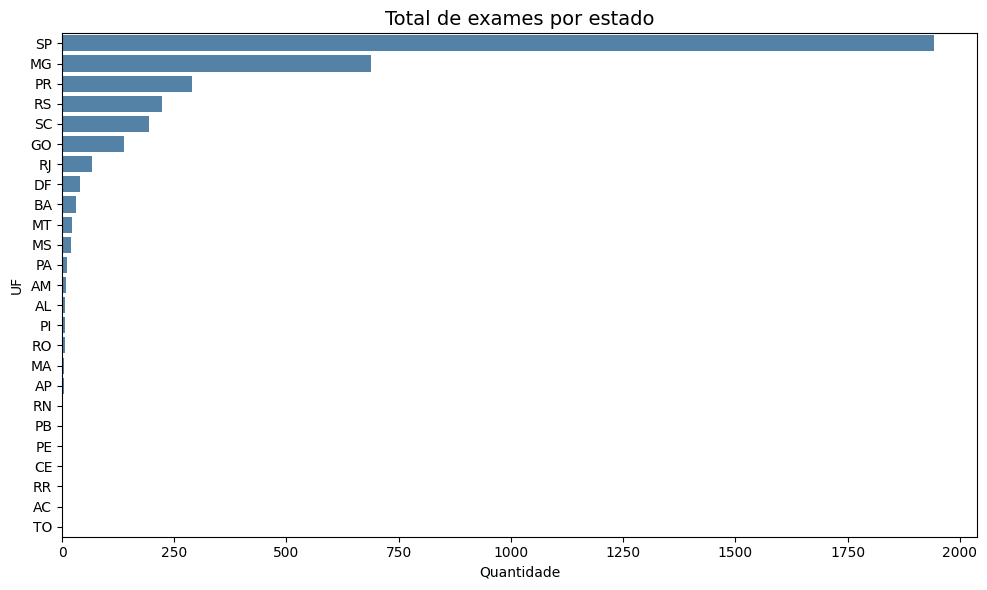

In [34]:
# Total de exames por estado

plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_exames_por_estado,
    x='quantidade_exames_realizados',
    y='sigla_uf_infeccao',
    color='steelblue'
)

plt.title('Total de exames por estado', fontsize=14)
plt.xlabel('Quantidade')
plt.ylabel('UF')
plt.tight_layout()
plt.show()

---

## 10- Total e tipos de exames realizados

> ### Destaques para exames de teste rápido (maior cobertura e agilidade)
> OBS: a desvantagem é terem menor sensibilidade (propensão à falsos negativos)

In [35]:
# garante que df_2 é uma cópia independente
df = df.copy()

# substitui strings vazias ou só espaços por NaN na coluna exames_realizados
df['exames_realizados'] = df['exames_realizados'].replace(r'^\s*$', pd.NA, regex=True)

# cria lista de exames já limpando valores vazios ou NaN (mantendo as linhas)
df['exames_lista'] = df['exames_realizados'].dropna().str.split(r',\s*')

# para as linhas que tinham NaN, exames_lista fica NaN, mantendo alinhamento das linhas
df.loc[df['exames_realizados'].isna(), 'exames_lista'] = pd.NA

# explode e remove valores nulos da lista
df_exploded = df.explode('exames_lista').dropna(subset=['exames_lista'])

# contagem e proporção
resultado = df_exploded['exames_lista'].value_counts().to_frame('contagem')
resultado['proporcao'] = round(resultado['contagem'] / resultado['contagem'].sum(), 3)

resultado = resultado.reset_index().rename(columns={'index': 'exame'})

resultado

,exames_lista,contagem,proporcao
0,resultado_ns1,3286,0.664
1,resultado_sorologia_dengue,1331,0.269
2,resultado_pcr,287,0.058
3,imunohistoquimica,19,0.004
4,histopatologia,14,0.003
5,resultado_viral,11,0.002


In [36]:
resultado['contagem'].sum()

4948

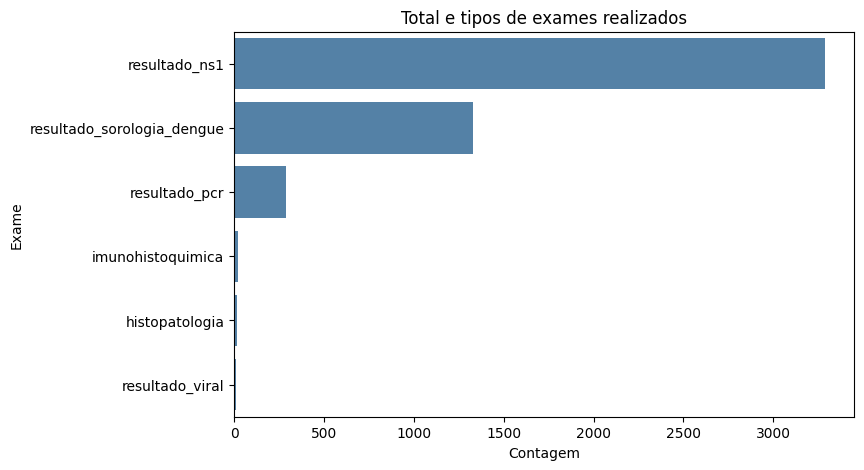

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(y='exames_lista', x='contagem', data=resultado, color='steelblue')
plt.title('Total e tipos de exames realizados')
plt.xlabel('Contagem')
plt.ylabel('Exame')
plt.show()

---

## 11- Total de exames PCR realizados por estado

> ### Minas gerais foi o estado de maior destaque na realização de PCR para diagnóstico
> OBS: PCR é padrão ouro em diagnóstico, no entanto, exige maior infraestrutura e tempo, mais esperado ver em estados com mais recursos financeiros

In [38]:
# Nova coluna

mapeamento = {
    "Positivo": "Sim",
    "Negativo": "Sim",
    "Inconclusivo": "Sim",
    "Não Realizado": "Não",
    "Não informado": "Não informado"
}

df['realizou_pcr'] = df['resultado_pcr'].map(mapeamento)

In [39]:
df['realizou_pcr'].value_counts(dropna=False)

realizou_pcr
NaN    5175
Não    3797
Sim     287
Name: count, dtype: int64

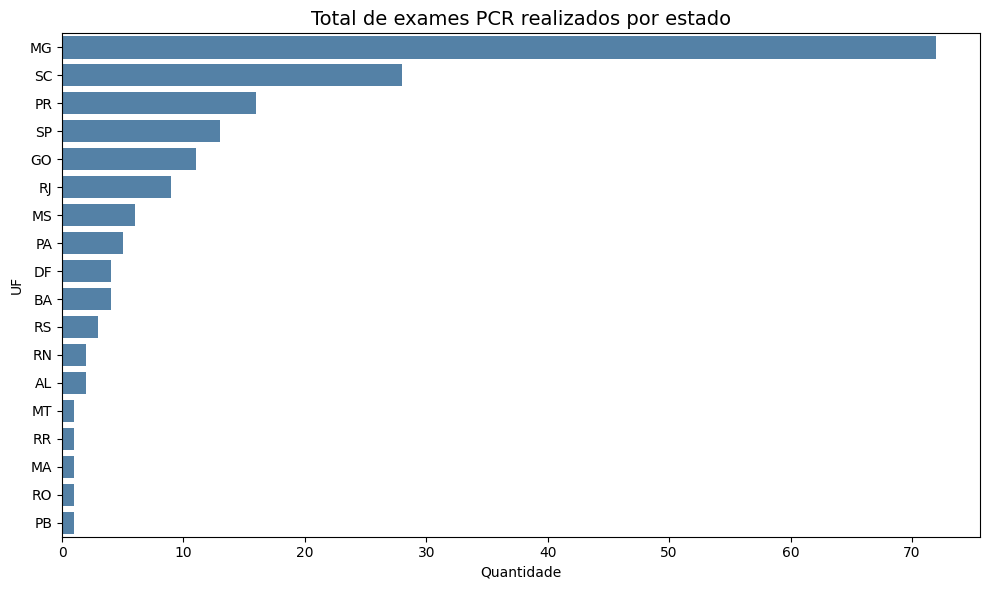

In [40]:
# Filtrar só quem realizou PCR
filtro_sim = df['realizou_pcr'] == 'Sim'

# Contar casos por estado
tabela = df.loc[filtro_sim, 'sigla_uf_infeccao'].value_counts().reset_index()
tabela.columns = ['sigla_uf_infeccao', 'quantidade']

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabela,
    x='quantidade',
    y='sigla_uf_infeccao',
    color='steelblue'
)

plt.title('Total de exames PCR realizados por estado', fontsize=14)
plt.xlabel('Quantidade')
plt.ylabel('UF')
plt.tight_layout()
plt.show()

---

## 12- Conflito dos exames e o diagnóstico final

> ### A maioria dos casos com diagnóstico final apresentou conflito com os resultados dos exames
> OBS: A predominância de exames do tipo teste rápido (NS1 e sorologia) pode ter gerado muitos falsos negativos, o que pode entrar em conflito com o diagnóstico final, baseado na combinação de febre e demais sintomas clínicos.

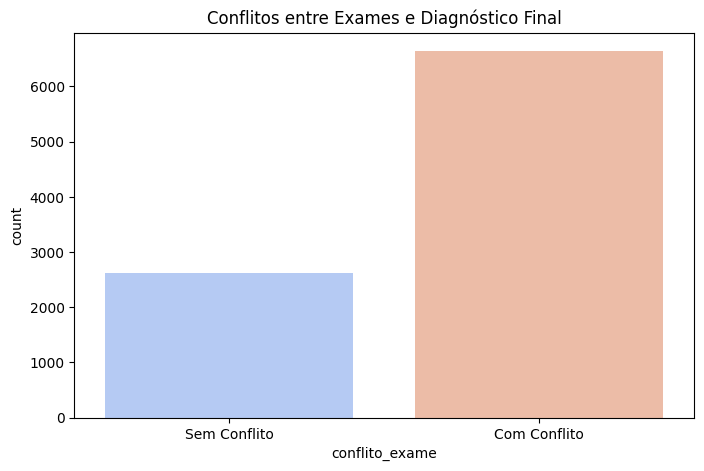

In [41]:
exames = ["resultado_ns1", "resultado_viral", "resultado_pcr", "resultado_sorologia_dengue"]

# Criar coluna para marcar conflito
def verificar_conflito(row):
    resultados = [str(row[ex]) for ex in exames if pd.notnull(row[ex])]
    # Aqui se verifica se algum resultado é diferente da classificação final
    return any(r.lower() not in str(row["classificacao_final"]).lower() for r in resultados)

df.loc[:, "conflito_exame"] = df.apply(verificar_conflito, axis=1)

# print(df_3["conflito_exame"].value_counts())

# Aqui se monta o gráfico de lista de exames
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="conflito_exame",
    hue="conflito_exame",
    palette="coolwarm",
    legend=False
)
plt.title("Conflitos entre Exames e Diagnóstico Final")
plt.xticks([0,1], ["Sem Conflito", "Com Conflito"])
plt.show()

In [42]:
df['conflito_exame'].value_counts()

conflito_exame
True     6642
False    2617
Name: count, dtype: int64

---

## 13- Quantos casos graves eram de gestantes

> ### Nenhum caso grave foi registrado em gestantes, entretanto, foram diagnosticados 63 casos de dengue habitual.

In [43]:
df['gestantes'] = df['gestante_paciente'].replace({
    'Não se aplica': 'Não',
    'Ignorado' : 'Não',
    '2º Trimestre': 'Sim',
    '1º Trimestre ': 'Sim',
    '3º Trimestre': 'Sim',
    'Idade gestacional ignorada': 'Sim'
})

In [44]:
df['gestante_paciente'].value_counts()

gestante_paciente
Não se aplica                 5007
Não                           3321
Ignorado                       854
2º Trimestre                    25
1º Trimestre                    17
3º Trimestre                    16
Idade gestacional ignorada      14
Name: count, dtype: int64

In [45]:
df['gestantes'].value_counts()

gestantes
Não    9182
Sim      72
Name: count, dtype: int64

In [46]:
# Dengue normal

df['gestantes'][
    (df['gestantes'] == 'Sim') & 
    (df['classificacao_final'] == 'Dengue')
].count()

63

In [47]:
# Dengue grave

df['gestantes'][
    (df['gestantes'] == 'Sim') & 
    (df['classificacao_final'] == 'Dengue grave')
].count()

0

---

## 14- Classificação final e evolução do diagnóstico geral, por raça, sexo e escolaridade

> ### A maioria dos casos de dengue evoluíram com cura.

In [48]:
classificacao_evolucao = df.groupby(['classificacao_final', 'evolucao_caso']).size().unstack(fill_value=0)
classificacao_evolucao

evolucao_caso,Cura,Ignorado,Óbito pelo agravo
classificacao_final,,,
Dengue,7376,310,2
Dengue com sinais de alarme,124,6,2
Dengue grave,10,0,4


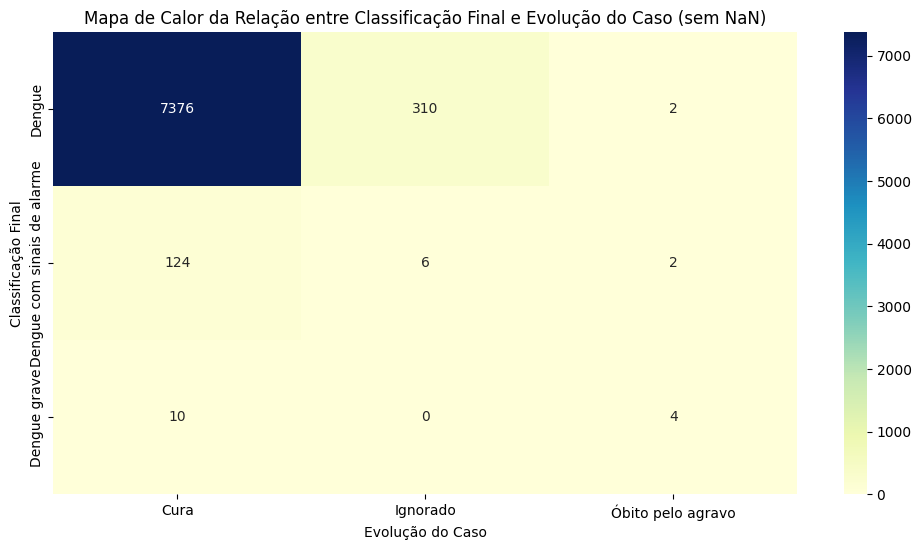

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(classificacao_evolucao, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor da Relação entre Classificação Final e Evolução do Caso (sem NaN)')
plt.xlabel('Evolução do Caso')
plt.ylabel('Classificação Final')
plt.show()

### Raça

In [50]:
df_filtrado_sem_nulos = df.dropna(subset=['evolucao_caso', 'classificacao_final', 'raca_cor_paciente']) #remover valores nulos (NaN)
df_filtrado_sem_nulos = df_filtrado_sem_nulos[df_filtrado_sem_nulos['raca_cor_paciente'] != 'Ign/Branco'] #remover ign/branco

In [51]:
counts = df_filtrado_sem_nulos.groupby(['raca_cor_paciente', 'classificacao_final', 'evolucao_caso']).size().unstack(fill_value=0)
counts

evolucao_caso                                  Cura  Ignorado  \
raca_cor_paciente classificacao_final                           
Amarela           Dengue                         65         3   
                  Dengue com sinais de alarme     4         0   
Branca            Dengue                       3267       107   
                  Dengue com sinais de alarme    60         1   
                  Dengue grave                    2         0   
Indigena          Dengue                         12         1   
Parda             Dengue                       2511       103   
                  Dengue com sinais de alarme    30         2   
                  Dengue grave                    6         0   
Preta             Dengue                        373        14   
                  Dengue com sinais de alarme     5         1   

evolucao_caso                                  Óbito pelo agravo  
raca_cor_paciente classificacao_final                             
Amarela           Dengue                                       0  
                  Dengue com sinais de alarme                  0  
Branca            Dengue                                       1  
                  Dengue com sinais de alarme                  1  
                  Dengue grave                                 3  
Indigena          Dengue                                       0  
Parda             Dengue                                       1  
                  Dengue com sinais de alarme                  1  
                  Dengue grave                                 1  
Preta             Dengue                                       0  
                  Dengue com sinais de alarme                  0

> ### Destaque de casos de dengue habitual para pessoas brancas e pardas e dengue grave para pessoas pardas

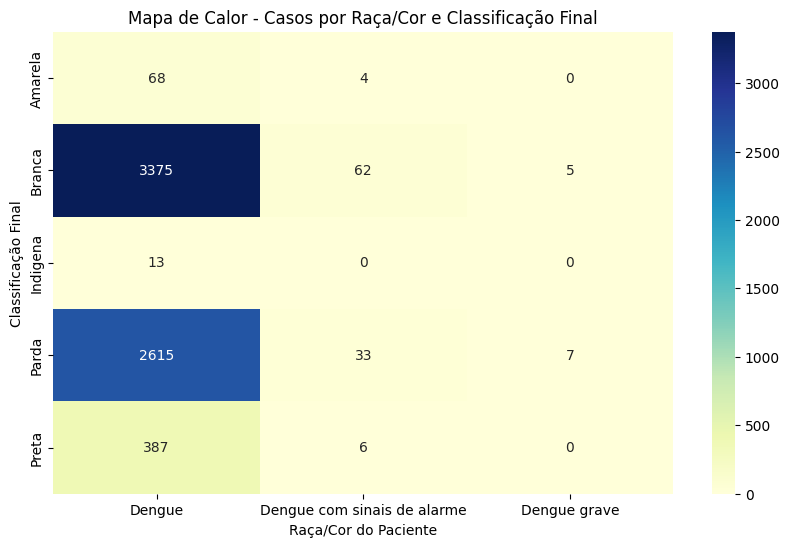

In [52]:
counts_race = df_filtrado_sem_nulos.groupby(['raca_cor_paciente', 'classificacao_final']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(counts_race, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de Calor - Casos por Raça/Cor e Classificação Final')
plt.xlabel('Raça/Cor do Paciente')
plt.ylabel('Classificação Final')
plt.show()

### Sexo

In [53]:
counts_sexo = df_filtrado_sem_nulos.groupby(['sexo_paciente', 'classificacao_final',
                                             'evolucao_caso']).size().unstack(fill_value=0)

In [54]:
# remover sexo=ignorado

df_filtrado_sem_nulos = df_filtrado_sem_nulos[df_filtrado_sem_nulos['sexo_paciente'] != 'Ignorado']

counts_sexo = df_filtrado_sem_nulos.groupby(['sexo_paciente', 'classificacao_final',
                                             'evolucao_caso']).size().unstack(fill_value=0)
counts_sexo

evolucao_caso                              Cura  Ignorado  Óbito pelo agravo
sexo_paciente classificacao_final                                           
Feminino      Dengue                       3457       129                  1
              Dengue com sinais de alarme    66         1                  1
              Dengue grave                    6         0                  1
Masculino     Dengue                       2768        99                  1
              Dengue com sinais de alarme    33         3                  1
              Dengue grave                    2         0                  3

> ### Distribuição de evolução equiparada considerando a volumetria de pessoas por sexo (cura e ignorado), no entanto, destaque para indivíduos do sexo masculino com óbito pelo agravo

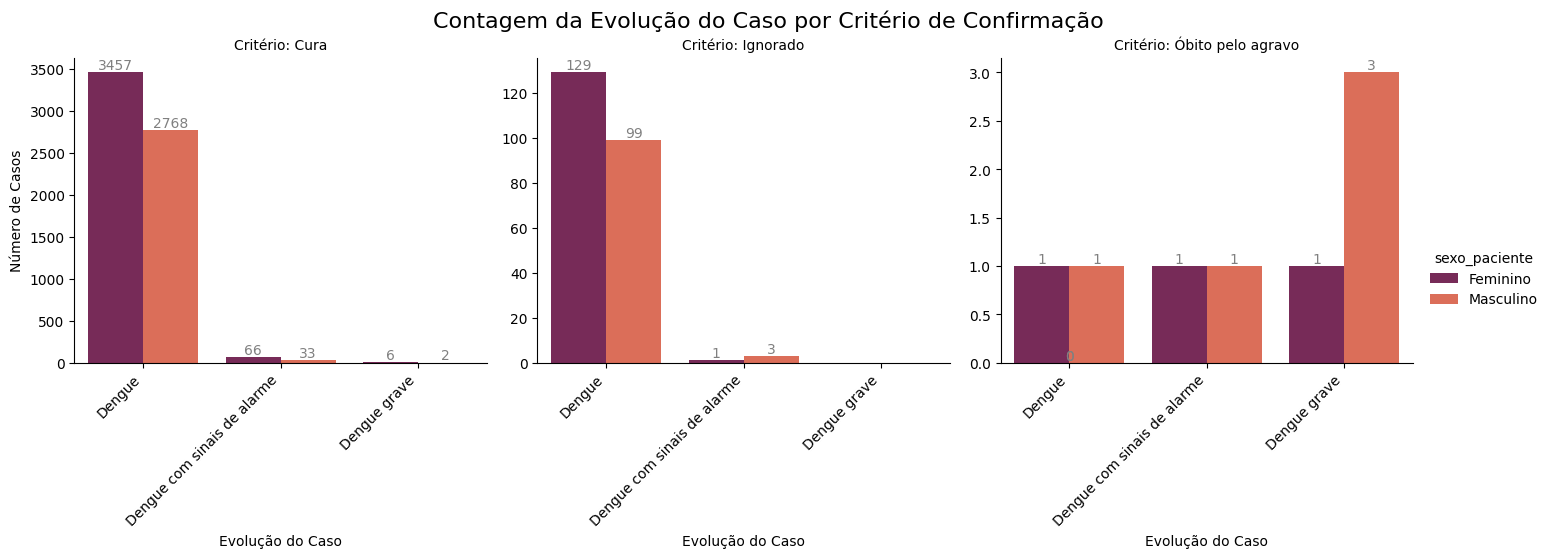

In [55]:
g = sns.catplot(data=df_filtrado_sem_nulos, kind='count', x='classificacao_final', hue='sexo_paciente',
    col='evolucao_caso',  palette="rocket", height=4, aspect=1.2, sharey=False)

g.fig.suptitle('Contagem da Evolução do Caso por Critério de Confirmação', y=1.03, fontsize=16)

# Melhorar a legibilidade dos rótulos do eixo X
g.set_xticklabels(rotation=45, ha='right')
# Customizar os títulos de cada sub-gráfico
g.set_titles("Critério: {col_name}")
# Customizar os rótulos dos eixos
g.set_axis_labels("Evolução do Caso", "Número de Casos")
#adicionar rótulos
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            p.get_height(),
            f'{int(p.get_height())}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='gray'
        )
plt.show()

### Escolaridade

> ### Ensino médio completo em destaque em todas as classificações de evolução dos casos (maior volumetria)

In [56]:
counts_escolaridade = df_filtrado_sem_nulos.groupby(['escolaridade_paciente', 'classificacao_final',
                                                     'evolucao_caso']).size().unstack(fill_value=0).sort_values(by='Cura',ascending=False)
counts_escolaridade

,evolucao_caso,Cura,Ignorado,Óbito pelo agravo
escolaridade_paciente,classificacao_final,,,
Ignorado,Dengue,1565,64,0
Ensino médio completo (antigo colegial ou 2° grau),Dengue,1245,54,0
5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau),Dengue,394,24,0
Não se aplica,Dengue,359,14,0
Ensino médio incompleto (antigo colegial ou 2° grau),Dengue,357,11,0
Educação superior completa,Dengue,321,9,0
Ensino fundamental completo (antigo ginásio ou 1° grau),Dengue,278,7,0
1ª a 4ª série incompleta do EF,Dengue,218,5,1
4ª série completa do EF ( antigo 1° grau),Dengue,138,5,0


---

## 15- Idade média, faixa etária mais afetada e menos afetada

In [57]:
# Tratamento na coluna de idade

# Assegurar que a coluna seja do tipo string para manipulação
df['idade_paciente_str'] = df['idade_paciente'].astype(str)

# Remover os dois primeiros caracteres da string
df['idade_tratada'] = df['idade_paciente_str'].str.slice(start=2)

# Converter a nova coluna para um tipo numérico
df['idade_tratada'] = pd.to_numeric(df['idade_tratada'], errors='coerce')

# Selecionar e exibir as colunas original e transformada lado a lado
print(df[['idade_paciente', 'idade_tratada']].dropna().head(10))

  idade_paciente  idade_tratada
0          4-053             53
1          4-033             33
2          4-006              6
3          4-043             43
4          4-060             60
5          4-017             17
6          4-014             14
7          4-015             15
8          4-009              9
9          4-042             42


In [58]:
# criar faixa etária
bins = [-1, 9, 19, 29, 39, 49, 59, 120]
labels = ['0-9 anos', '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos', '50-59 anos', '60+ anos']
df['faixa_etaria'] = pd.cut(df['idade_tratada'], bins=bins, labels=labels, right=True)

In [59]:
df['faixa_etaria'].value_counts(dropna=False)

faixa_etaria
20-29 anos    1634
30-39 anos    1483
40-49 anos    1439
10-19 anos    1433
60+ anos      1366
50-59 anos    1166
0-9 anos       738
Name: count, dtype: int64

In [60]:
idade_dengue = df.groupby(['faixa_etaria', 'classificacao_final'], observed=True).size().unstack(fill_value=0)
idade_dengue

classificacao_final,Dengue,Dengue com sinais de alarme,Dengue grave
faixa_etaria,,,
0-9 anos,647,10,2
10-19 anos,1269,18,3
20-29 anos,1455,21,1
30-39 anos,1322,25,2
40-49 anos,1304,10,0
50-59 anos,1057,19,2
60+ anos,1242,35,5


> ### A maioria dos casos de dengue ocorreu nas faixas etárias de 20-29 e 30-39 anos; entretanto, os casos graves predominaram entre indivíduos com 60 anos ou mais
> OBS: influência das comorbidades na evolução para casos graves (diabetes, hipertensão, etc).

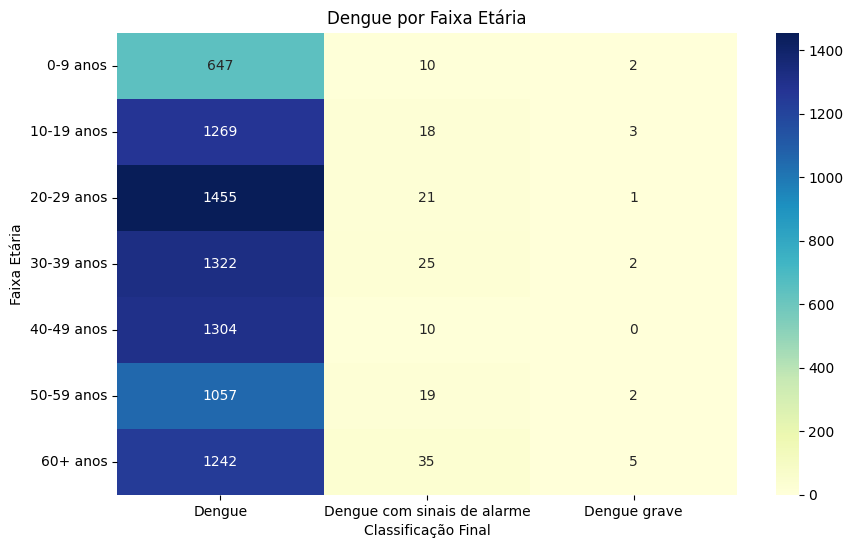

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(idade_dengue, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Dengue por Faixa Etária')
plt.xlabel('Classificação Final')
plt.ylabel('Faixa Etária')
plt.show()

---

## 16- Diagnóstico final: quantos % clínico e quantos % laboratorial

In [62]:
df_confirmacao_sem_nulos = df.dropna(subset=['criterio_confirmacao']) #remover valores nulos (NaN)

In [63]:
tipo_diagnostico = df_confirmacao_sem_nulos.groupby(['criterio_confirmacao', 'classificacao_final']).size().unstack(fill_value=0)
tipo_diagnostico

classificacao_final,Dengue,Dengue com sinais de alarme,Dengue grave
criterio_confirmacao,,,
Clínico Epidemiológico,5183,63,6
Em investigação,44,5,0
Laboratório,3069,70,9


In [64]:
count_diagnostico = (
    df_confirmacao_sem_nulos['criterio_confirmacao']
    .value_counts(dropna=False)
    .rename_axis('criterio_confirmacao')
    .reset_index(name='count')
)
count_diagnostico

,criterio_confirmacao,count
0,Clínico Epidemiológico,5262
1,Laboratório,3151
2,Em investigação,88


> ### O critério de confirmação da dengue foi mais frequentemente baseado em avaliação clínica (sintomas) do que em exames laboratoriais

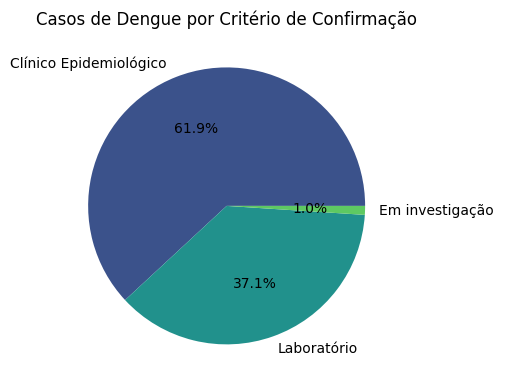

In [65]:
plt.figure(figsize=(5,5))
plt.pie(count_diagnostico["count"], labels=count_diagnostico["criterio_confirmacao"], autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(count_diagnostico)))
plt.title("Casos de Dengue por Critério de Confirmação")
plt.tight_layout()
plt.show()

---

## 17- Óbitos por UF

> ### Destaque para óbitos no Sul e Sudeste, regiões com maior volumetria registrada.

In [66]:
df["evolucao_caso"].unique()

array(['Cura', nan, 'Ignorado', 'Óbito pelo agravo',
       'Óbito em investigação'], dtype=object)

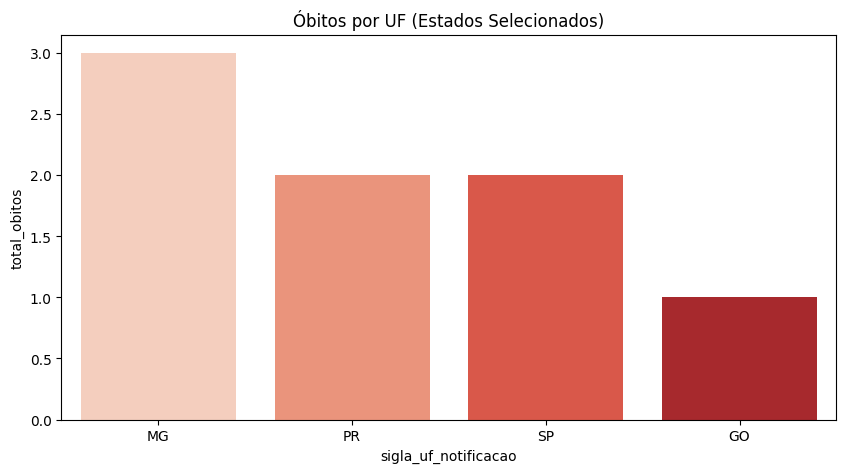

In [67]:
obitos_por_uf = (
    df[df["evolucao_caso"].str.contains("Óbito", case=False, na=False) &
       df["sigla_uf_notificacao"].isin(estados_selecionados)]
    .groupby("sigla_uf_notificacao")
    .size()
    .reset_index(name="total_obitos")
).sort_values(by='total_obitos', ascending=False)

# Aqui se monta o gráfico de morte por UF. Está se baseando nos estados levantados no ponto 1.
plt.figure(figsize=(10,5))
sns.barplot(
    data=obitos_por_uf,
    x="sigla_uf_notificacao",
    y="total_obitos",
    hue="sigla_uf_notificacao",
    palette="Reds",
    legend=False
)
plt.title("Óbitos por UF (Estados Selecionados)")
plt.show()